In [1]:
%load_ext autoreload
%autoreload 2
import transformers
import torch
import math
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from mcllm.model.llm import *
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch.utils.data as data
from mcllm.data.synthetic import LowRankDataset

[2023-10-31 09:38:37,310] [INFO] [real_accelerator.py:158:get_accelerator] Setting ds_accelerator to cuda (auto detect)


In [5]:
# create a dataloader
m = 10
n = 10
rank = 3
frac_nan_mask = 0.1
seed = 13
use_rowcol_attn = 1
n_registers = 0
dataset = LowRankDataset(m, n, rank, frac_nan_mask, seed=seed,
                         n_registers=n_registers, use_rowcol_attn=use_rowcol_attn)

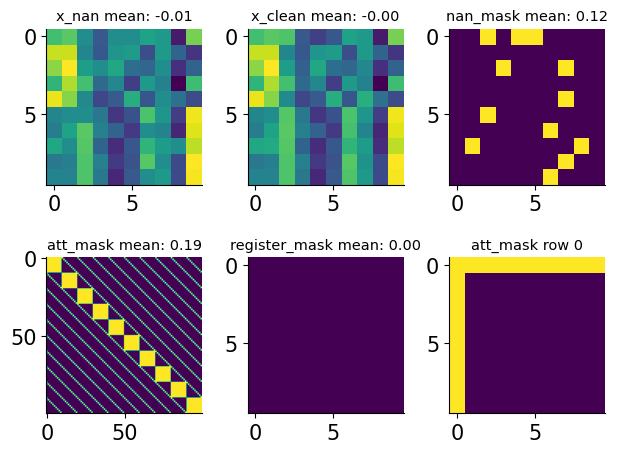

In [7]:
# visualize each of these matrices as a heatmap with title as the variable name
x_nan_t, x_clean_t, nan_mask_t, att_mask_t, register_mask_t = dataset[0]
mat_dict = {
    'x_nan': x_nan_t,
    'x_clean': x_clean_t,
    'nan_mask': nan_mask_t,
    'att_mask': att_mask_t,
    'register_mask': register_mask_t
}
for i, (k, v) in enumerate(mat_dict.items()):
    plt.subplot(2, 3, i+1)
    if not k == 'att_mask':
        plt.imshow(v.reshape(m + n_registers, n + n_registers))
    else:
        plt.imshow(v)
    plt.title(f'{k} mean: {v.mean().item():.2f}', fontsize='x-small')

# att_mask 0
plt.subplot(2, 3, i+1 + 1)
plt.title('att_mask row 0', fontsize='x-small')
plt.imshow(att_mask_t[0].reshape(m + n_registers, n + n_registers))